<a href="https://colab.research.google.com/github/jazminniew/Tp1-IA/blob/main/Niewiadomski_Dayan_Gouget_ABD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importar cosas



In [919]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install scikit-learn
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, precision_score, roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [920]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Exploración de Datos

In [921]:
std

,Sex,Graduated high-school type,Scholarship type,Additional work,Regular artistic or sports activity,Do you have a partner,Transportation to the university,Accommodation type in Cyprus,Mother’s education,Father’s education,...,Mother’s occupation,Father’s occupation,Reading frequency.1,Attendance to the seminars/conferences related to the department,Impact of your projects/activities on your success,Listening in classes,Discussion improves my interest and success in the course,Flip-classroom,COURSE ID,GRADE
0,2,2,2,0,1,1,0,0,0,2,...,1,4,2,0,0,2,0,1,1,False
1,2,2,2,0,1,1,0,0,1,3,...,1,0,2,0,0,2,2,1,1,False
2,2,1,2,1,1,1,3,1,1,2,...,1,0,2,0,0,2,0,0,1,False
3,1,0,2,0,1,0,0,1,0,2,...,1,0,2,0,0,2,1,0,1,False
4,2,0,2,1,1,0,0,3,2,3,...,1,3,1,0,0,2,1,0,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,1,1,2,0,0,1,0,1,0,2,...,1,3,2,0,0,1,1,0,9,True
141,1,1,3,1,1,1,3,1,0,1,...,1,0,2,1,0,2,1,0,9,True
142,1,0,3,1,1,1,0,0,2,4,...,1,3,2,0,0,3,1,0,9,False
143,1,1,3,0,0,0,1,2,3,4,...,2,2,1,0,0,1,1,0,9,False


In [922]:
std = pd.read_csv("stddata.csv")
std_filtro = std[["COURSE ID", "GRADE", "Student Age", "STUDENT ID"]]
std_filtro.head()


,COURSE ID,GRADE,Student Age,STUDENT ID
0,1,1,2,STUDENT1
1,1,1,2,STUDENT2
2,1,1,2,STUDENT3
3,1,1,1,STUDENT4
4,1,1,2,STUDENT5


In [923]:
std

,STUDENT ID,Student Age,Sex,Graduated high-school type,Scholarship type,Additional work,Regular artistic or sports activity,Do you have a partner,Total salary if available,Transportation to the university,...,Preparation to midterm exams 1,Preparation to midterm exams 2,Taking notes in classes,Listening in classes,Discussion improves my interest and success in the course,Flip-classroom,Cumulative grade point average in the last semester (/4.00),Expected Cumulative grade point average in the graduation (/4.00),COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,STUDENT141,2,1,2,3,1,1,2,1,1,...,1,1,2,1,2,1,3,3,9,5
141,STUDENT142,1,1,2,4,2,2,2,1,4,...,1,1,3,2,2,1,5,3,9,5
142,STUDENT143,1,1,1,4,2,2,2,1,1,...,1,1,3,3,2,1,4,3,9,1
143,STUDENT144,2,1,2,4,1,1,1,5,2,...,2,1,2,1,2,1,5,3,9,4


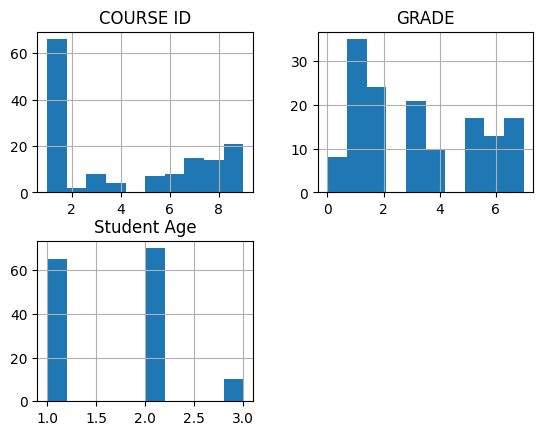

In [924]:
std_filtro.hist()
plt.show()

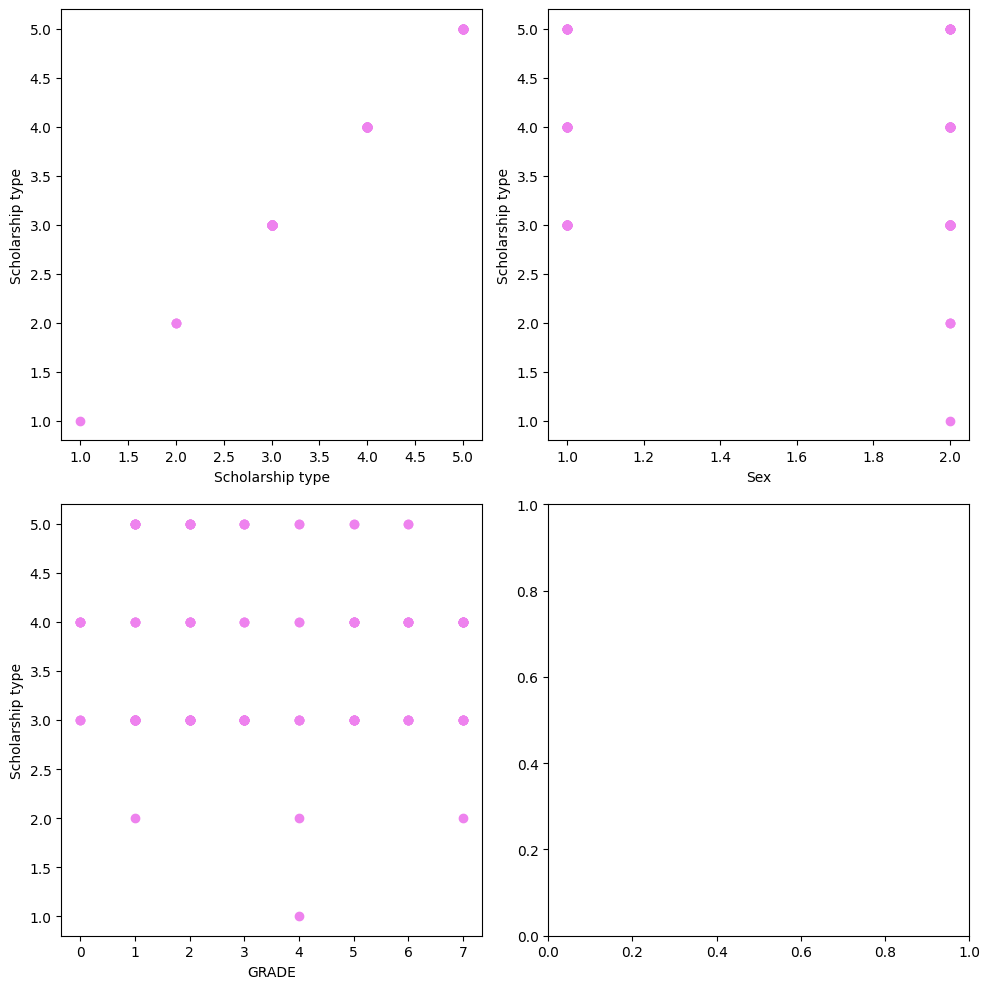

In [925]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

for i, e in enumerate(std[["Scholarship type", "Sex", "GRADE"]]):
    axs[i // 2, i % 2].scatter(std[e], std["Scholarship type"], color="violet")
    axs[i // 2, i % 2].set_xlabel(e)
    axs[i // 2, i % 2].set_ylabel("Scholarship type")

plt.tight_layout()
plt.show()

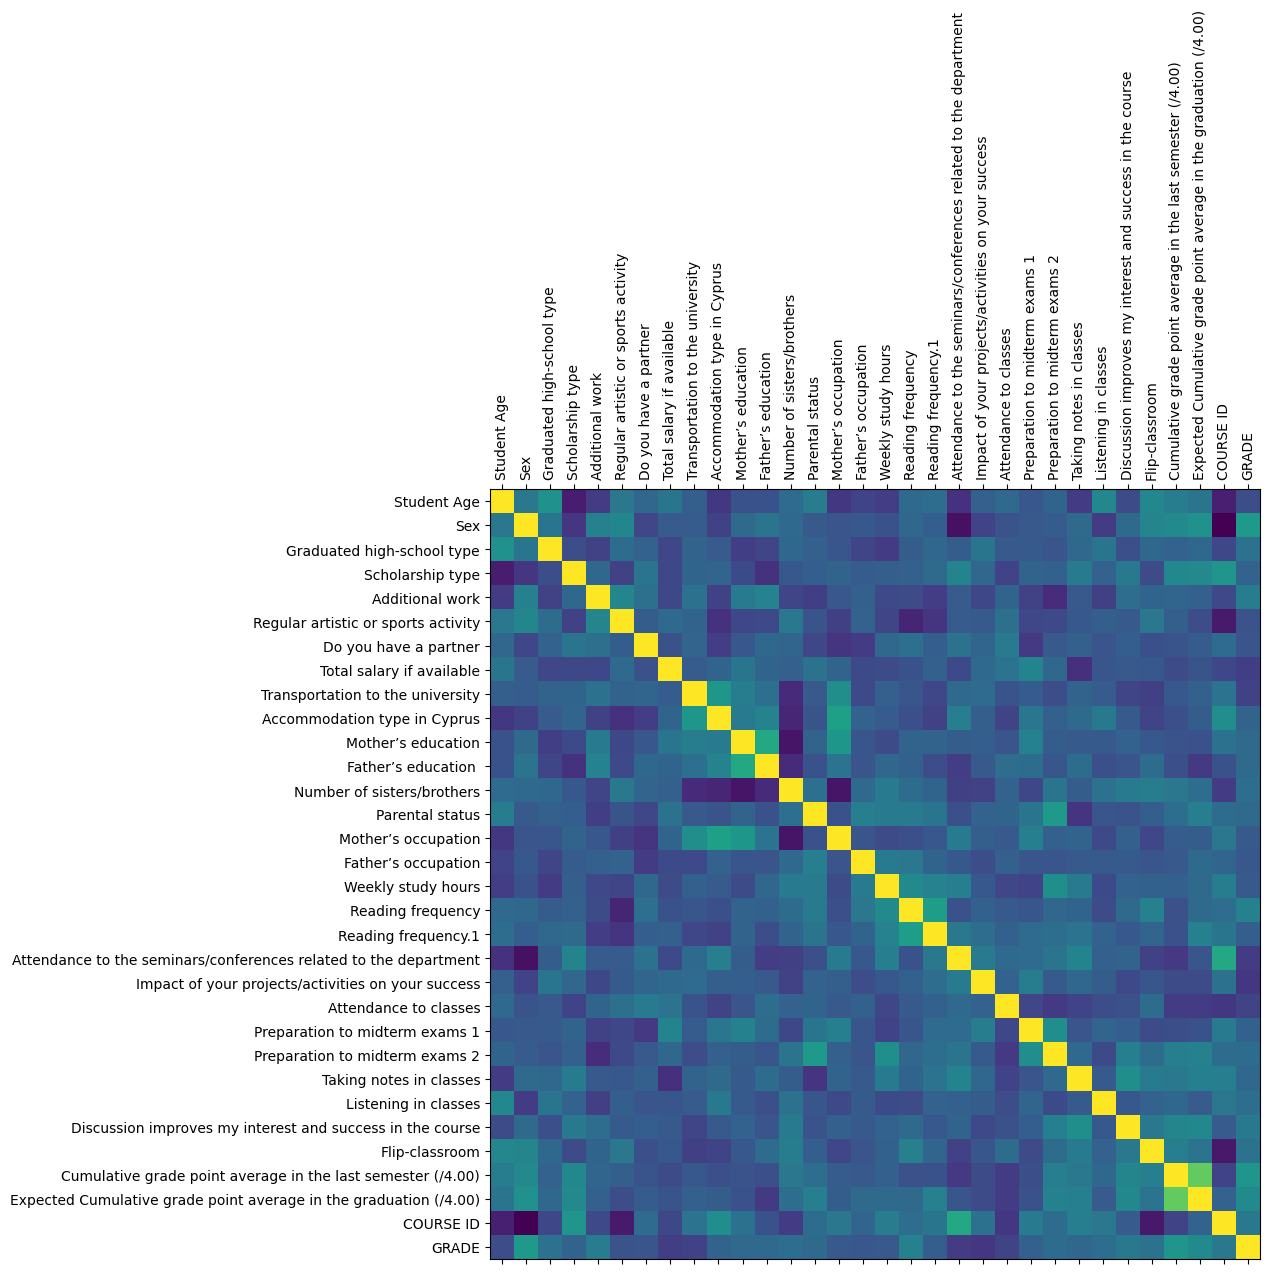

In [926]:
# Seleccionar solo las columnas numéricas
std_numerico = std.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
sd = std_numerico.corr()

# Graficar la matriz de correlación
fig, ax = plt.subplots(figsize=(10, 10))
ax.matshow(sd)

plt.xticks(range(len(sd.columns)), sd.columns, rotation=90)
plt.yticks(range(len(sd.columns)), sd.columns)

plt.show()


In [927]:
std["GRADE"].value_counts()

,count
GRADE,
1,35
2,24
3,21
5,17
7,17
6,13
4,10
0,8


###Modelo de regresion logistica

In [928]:
X_df = std.drop("GRADE", axis=1).drop("STUDENT ID", axis=1)
y_df = std["GRADE"] > 4

std = pd.concat([X_df, y_df], axis=1)
std

,Student Age,Sex,Graduated high-school type,Scholarship type,Additional work,Regular artistic or sports activity,Do you have a partner,Total salary if available,Transportation to the university,Accommodation type in Cyprus,...,Preparation to midterm exams 1,Preparation to midterm exams 2,Taking notes in classes,Listening in classes,Discussion improves my interest and success in the course,Flip-classroom,Cumulative grade point average in the last semester (/4.00),Expected Cumulative grade point average in the graduation (/4.00),COURSE ID,GRADE
0,2,2,3,3,1,2,2,1,1,1,...,1,1,3,2,1,2,1,1,1,False
1,2,2,3,3,1,2,2,1,1,1,...,1,1,3,2,3,2,2,3,1,False
2,2,2,2,3,2,2,2,2,4,2,...,1,1,2,2,1,1,2,2,1,False
3,1,1,1,3,1,2,1,2,1,2,...,1,2,3,2,2,1,3,2,1,False
4,2,2,1,3,2,2,1,3,1,4,...,2,1,2,2,2,1,2,2,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,2,1,2,3,1,1,2,1,1,2,...,1,1,2,1,2,1,3,3,9,True
141,1,1,2,4,2,2,2,1,4,2,...,1,1,3,2,2,1,5,3,9,True
142,1,1,1,4,2,2,2,1,1,1,...,1,1,3,3,2,1,4,3,9,False
143,2,1,2,4,1,1,1,5,2,3,...,2,1,2,1,2,1,5,3,9,False


<Axes: xlabel='GRADE', ylabel='Count'>

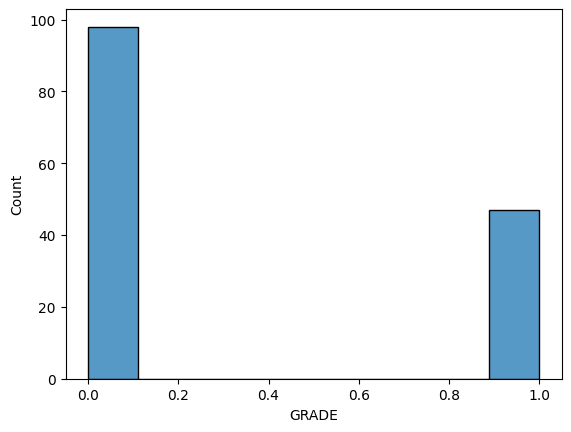

In [929]:
sns.histplot(std["GRADE"], multiple="stack")


<Axes: xlabel='Cumulative grade point average in the last semester (/4.00)', ylabel='Count'>

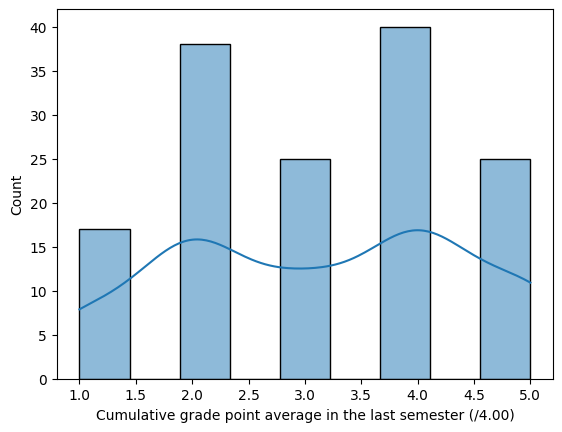

In [930]:
sns.histplot(std["Cumulative grade point average in the last semester (/4.00)"], kde=True)

<Axes: xlabel='Cumulative grade point average in the last semester (/4.00)', ylabel='Count'>

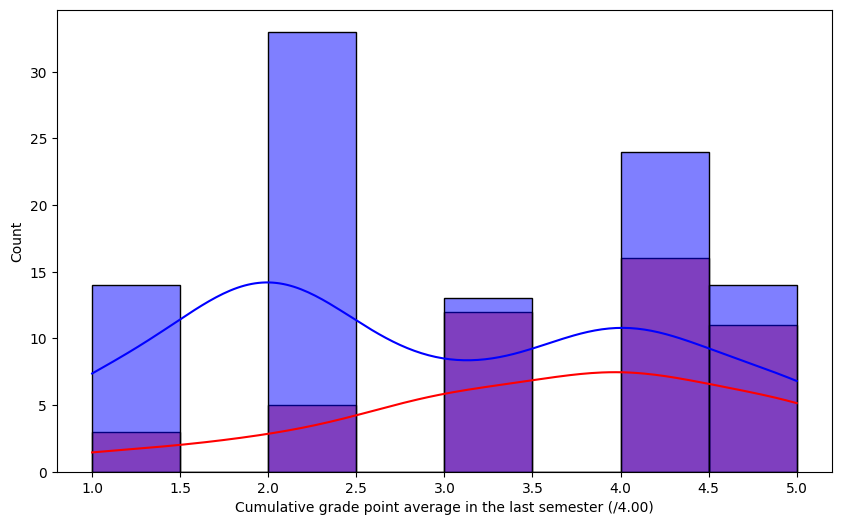

In [931]:
std_true = std[std["GRADE"] == 1]
std_false = std[std["GRADE"] == 0]

fig, ax = plt.subplots(figsize=(10, 6))

sns.histplot(std_true["Cumulative grade point average in the last semester (/4.00)"], kde=True, color="red", ax=ax)
sns.histplot(std_false["Cumulative grade point average in the last semester (/4.00)"], kde=True, color="blue", ax=ax) #ver que significa

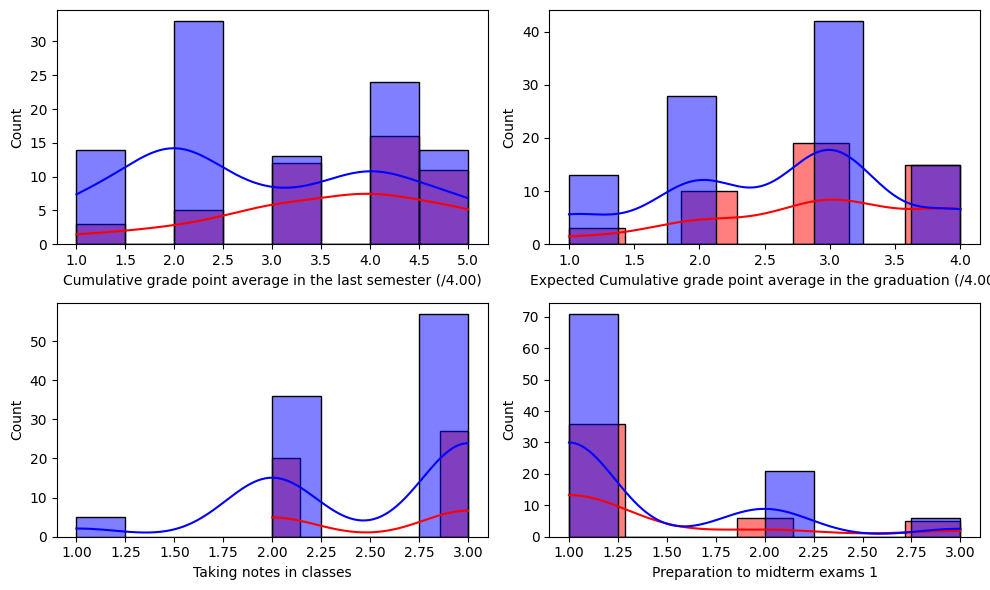

In [932]:
fig, axs = plt.subplots(2, 2, figsize=(10, 6))

sns.histplot(std_true["Cumulative grade point average in the last semester (/4.00)"], kde=True, color="red", ax=axs[0, 0])
sns.histplot(std_false["Cumulative grade point average in the last semester (/4.00)"], kde=True, color="blue", ax=axs[0, 0])

sns.histplot(std_true["Expected Cumulative grade point average in the graduation (/4.00)"], kde=True, color="red", ax=axs[0, 1])
sns.histplot(std_false["Expected Cumulative grade point average in the graduation (/4.00)"], kde=True, color="blue", ax=axs[0, 1])

sns.histplot(std_true["Taking notes in classes"], kde=True, color="red", ax=axs[1, 0])
sns.histplot(std_false["Taking notes in classes"], kde=True, color="blue", ax=axs[1, 0])

sns.histplot(std_true["Preparation to midterm exams 1"], kde=True, color="red", ax=axs[1, 1])
sns.histplot(std_false["Preparation to midterm exams 1"], kde=True, color="blue", ax=axs[1, 1])

fig.tight_layout()

In [933]:
#sns.pairplot(std, hue="GRADE")

#Entrenar modelo

regresion logistica

In [934]:
#dividimos en test y train
seed = 42
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=seed)

In [935]:
#training
log_model = LogisticRegression()
log_model.fit(X_train, y_train.values.ravel())

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Prediccion

In [936]:
y_pred = log_model.predict(X_test)
y_test.value_counts()

,count
GRADE,
False,20
True,9


Confusion Matrix

Accuracy: 0.6896551724137931


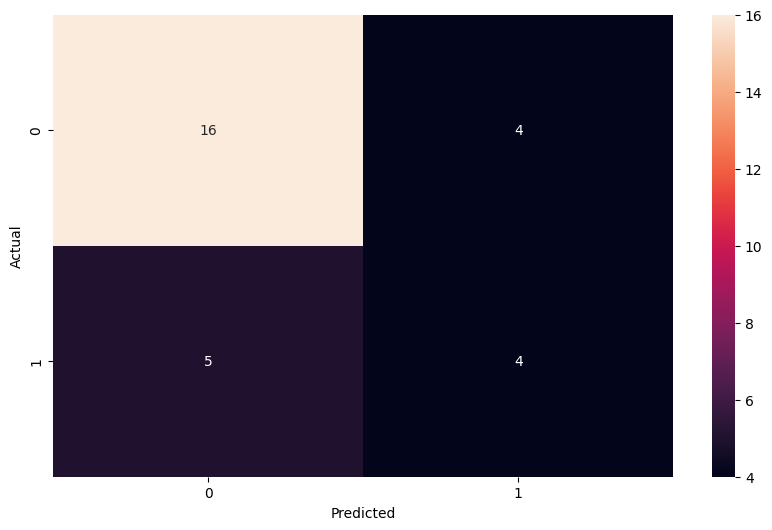

In [937]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(cm, annot=True, ax=ax)
_ = plt.xlabel("Predicted")
_ = plt.ylabel("Actual")

ROC AUC 1

In [938]:
ROC1 = roc_auc_score(y_test, y_pred)
ROC1

0.6222222222222222

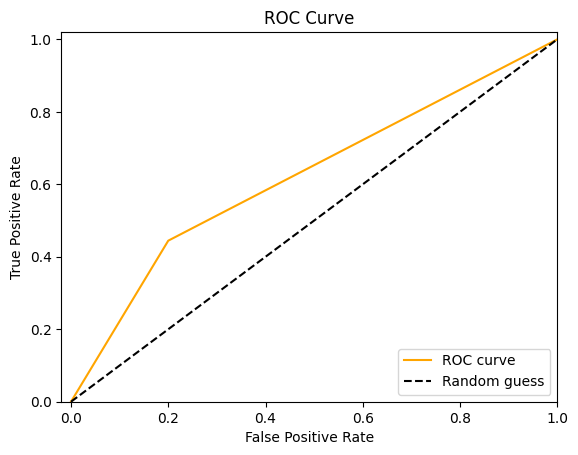

In [939]:
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label='ROC curve', color='orange')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")
plt.show()

Accurracy1

In [940]:
acc1 = accuracy_score(y_test, y_pred)
acc1

0.6896551724137931

In [941]:
precision1 = precision_score(y_test, y_pred)
precision1

0.5

In [942]:
abs(log_model.coef_)

array([[1.03755626, 1.18338929, 1.22026493, 0.49528646, 0.88211515,
        0.16827643, 0.08102364, 0.50951428, 0.28203264, 0.58180974,
        0.1079678 , 0.43188226, 0.49251608, 0.44679473, 0.07866095,
        0.32004975, 0.4533336 , 0.85966917, 0.57362672, 0.09704225,
        0.74038819, 0.14317353, 0.53668877, 0.00331784, 0.81438155,
        0.12131908, 0.16495144, 0.36783929, 0.74375265, 0.03939417,
        0.22471509]])

In [943]:
X_train.columns

Index(['Student Age', 'Sex', 'Graduated high-school type', 'Scholarship type',
       'Additional work', 'Regular artistic or sports activity',
       'Do you have a partner', 'Total salary if available',
       'Transportation to the university', 'Accommodation type in Cyprus',
       'Mother’s education', 'Father’s education ',
       'Number of sisters/brothers', 'Parental status', 'Mother’s occupation',
       'Father’s occupation', 'Weekly study hours', 'Reading frequency',
       'Reading frequency.1',
       'Attendance to the seminars/conferences related to the department',
       'Impact of your projects/activities on your success',
       'Attendance to classes', 'Preparation to midterm exams 1',
       'Preparation to midterm exams 2', 'Taking notes in classes',
       'Listening in classes',
       'Discussion improves my interest and success in the course',
       'Flip-classroom',
       'Cumulative grade point average in the last semester (/4.00)',
       'Expected Cumul

#Arboles de decision

In [944]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.76      0.80      0.78        20
        True       0.50      0.44      0.47         9

    accuracy                           0.69        29
   macro avg       0.63      0.62      0.63        29
weighted avg       0.68      0.69      0.68        29



Accuracy: 0.6896551724137931


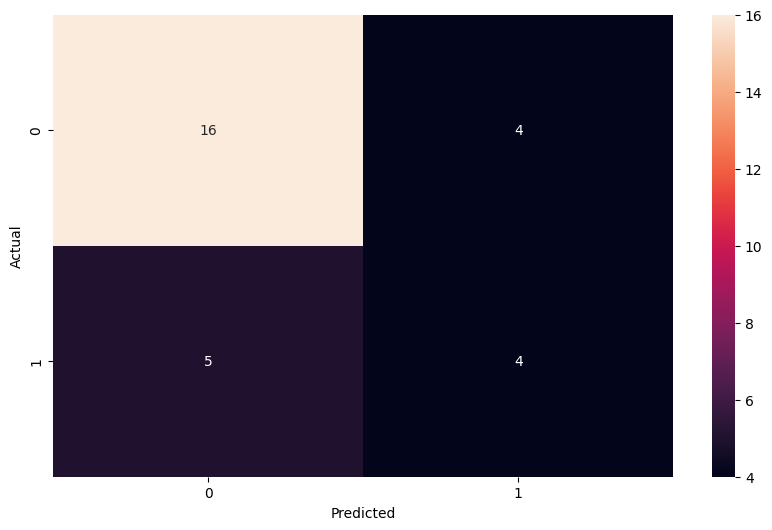

In [945]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("logistic", LogisticRegression())
])

pipe.fit(X_train, y_train.values.ravel())

y_pred_scale = pipe.predict(X_test)

acc = accuracy_score(y_test, y_pred_scale)
cm = confusion_matrix(y_test, y_pred_scale)

print("Accuracy:", acc)

fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(cm, annot=True, ax=ax)
_ = plt.xlabel("Predicted")
_ = plt.ylabel("Actual")

In [946]:
print("Coefficients:", log_model.coef_)
print("Intercept:", log_model.intercept_)

Coefficients: [[-1.03755626  1.18338929  1.22026493 -0.49528646  0.88211515 -0.16827643
  -0.08102364 -0.50951428 -0.28203264  0.58180974  0.1079678   0.43188226
   0.49251608  0.44679473 -0.07866095 -0.32004975 -0.4533336   0.85966917
   0.57362672 -0.09704225 -0.74038819  0.14317353  0.53668877  0.00331784
  -0.81438155  0.12131908  0.16495144  0.36783929  0.74375265 -0.03939417
   0.22471509]]
Intercept: [-9.19600076]


<BarContainer object of 31 artists>

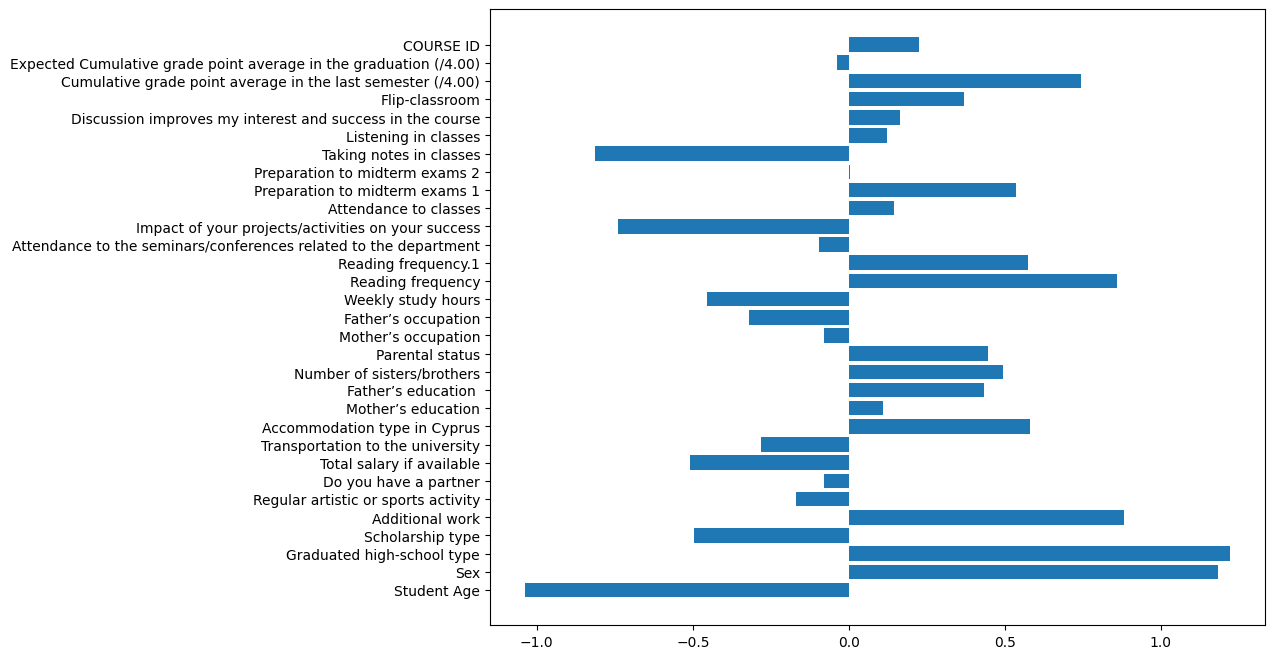

In [947]:
# Plot

fig, ax = plt.subplots(figsize=(10, 8))

ax.barh(X_df.columns, log_model.coef_[0])

<BarContainer object of 31 artists>

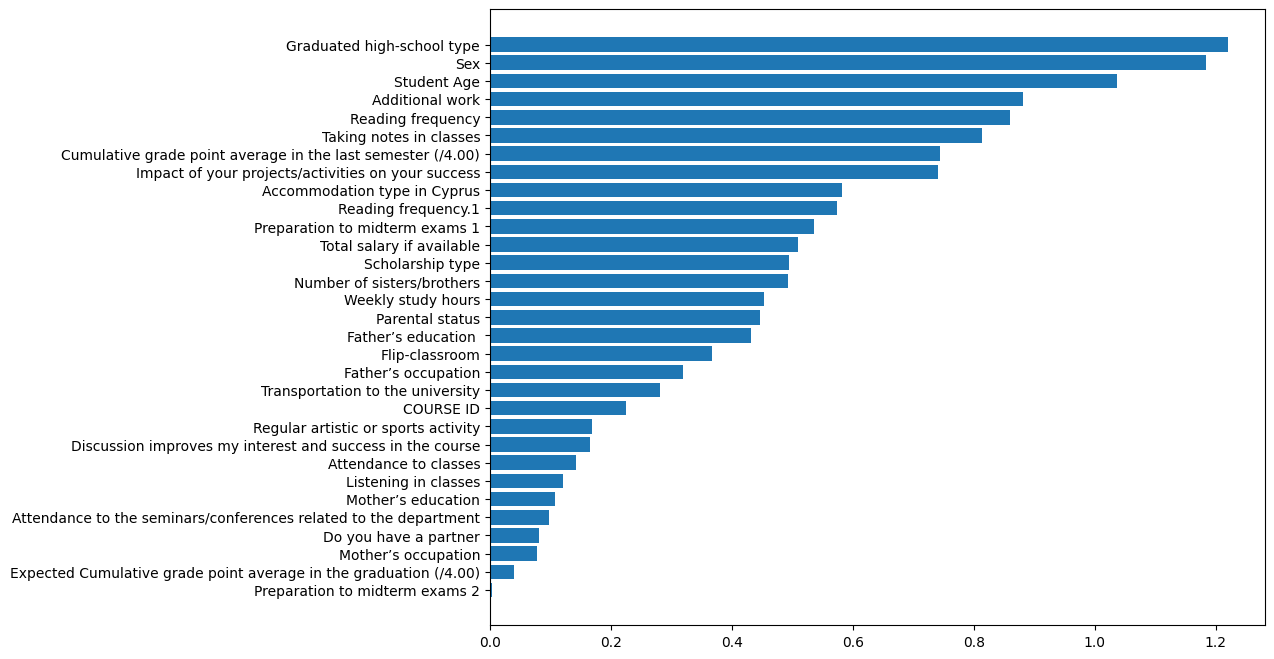

In [948]:
import numpy as np

fig, ax = plt.subplots(figsize=(10, 8))

feature_importances = pd.DataFrame(
    {"column": X_df.columns, "coef": np.abs(log_model.coef_[0])}
).sort_values(by="coef", ascending=True)

ax.barh(feature_importances["column"], feature_importances["coef"])

In [949]:
print("Coefficients:", pipe.named_steps["logistic"].coef_)
print("Intercept:", pipe.named_steps["logistic"].intercept_)

Coefficients: [[-0.82688324  0.84361938  0.86767034 -0.44871713  0.61991846 -0.07405686
   0.00561007 -0.50069166 -0.35079929  0.57715739  0.12785401  0.41811249
   0.69966065  0.32534756 -0.06837084 -0.47583876 -0.40314049  0.59489372
   0.47456228 -0.06524196 -0.59089532  0.09427424  0.36637924  0.02327171
  -0.61803835  0.18073099  0.12179591  0.28404449  1.1170697  -0.11617323
   0.72831151]]
Intercept: [-1.49435029]


<BarContainer object of 31 artists>

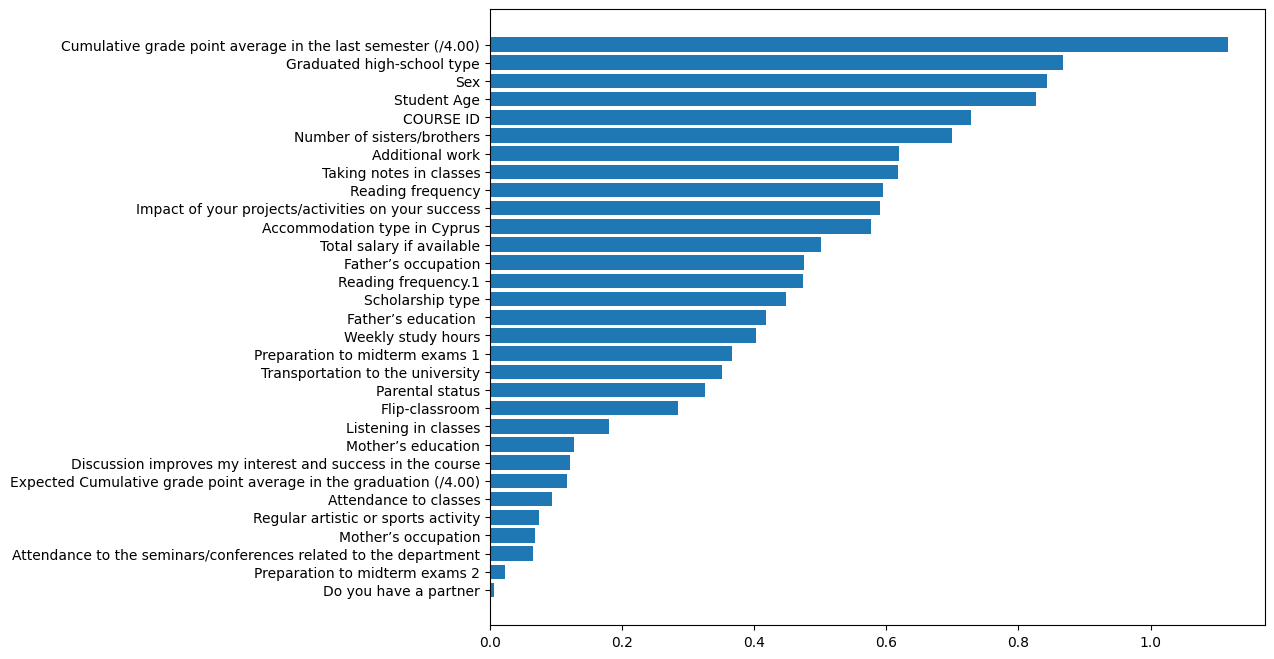

In [950]:
import numpy as np

fig, ax = plt.subplots(figsize=(10, 8))

feature_importances = pd.DataFrame(
    {"column": X_df.columns, "coef": np.abs(pipe.named_steps["logistic"].coef_[0])}
).sort_values(by="coef", ascending=True)

ax.barh(feature_importances["column"], feature_importances["coef"])

####ARBOLES


- hacer lo mismo pero solo con los categoricos (ej:sex)
- sacar con .drop de x_df en funcion de x_train SACAR NUMERICOS

Accuracy: 0.7931034482758621
              precision    recall  f1-score   support

       False       0.85      0.85      0.85        20
        True       0.67      0.67      0.67         9

    accuracy                           0.79        29
   macro avg       0.76      0.76      0.76        29
weighted avg       0.79      0.79      0.79        29



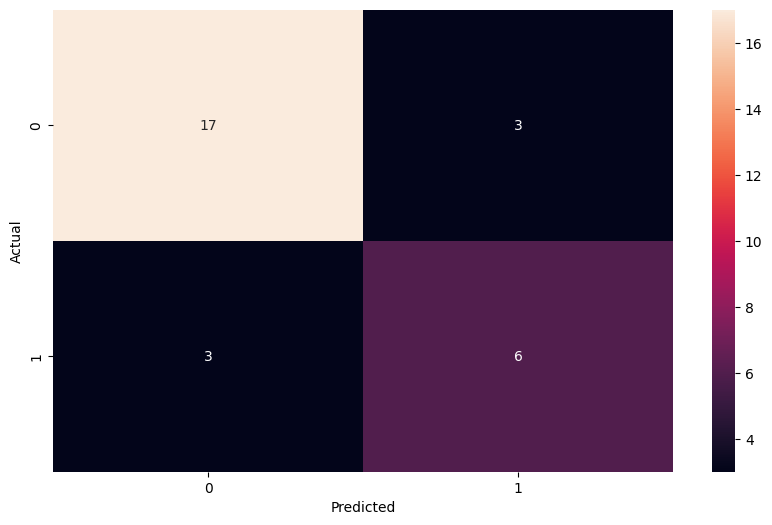

In [951]:
# Decision Tree CLassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
std = std.drop(['Student Age','Total salary if available','Number of sisters/brothers','Weekly study hours','Cumulative grade point average in the last semester (/4.00)','Expected Cumulative grade point average in the graduation (/4.00)', 'Preparation to midterm exams 1', 'Preparation to midterm exams 2', 'Reading frequency', 'Attendance to classes', 'Taking notes in classes'], axis=1) #ACA SACAR LOS categoricos PARA DESPUES HACER LOS CATEGORICOS

X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=seed)


dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)

fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(cm, annot=True, ax=ax)
_ = plt.xlabel("Predicted")
_ = plt.ylabel("Actual")

print(classification_report(y_test, y_pred))

In [952]:
!pip3 install pydotplus
import pydotplus
from six import StringIO
from IPython.display import Image, display
from sklearn.tree import export_graphviz

arbol = DecisionTreeClassifier(max_depth=3)
arbol.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3)

(array([23.,  0.,  0.,  0.,  0., 23.,  0.,  0.,  0.,  1.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

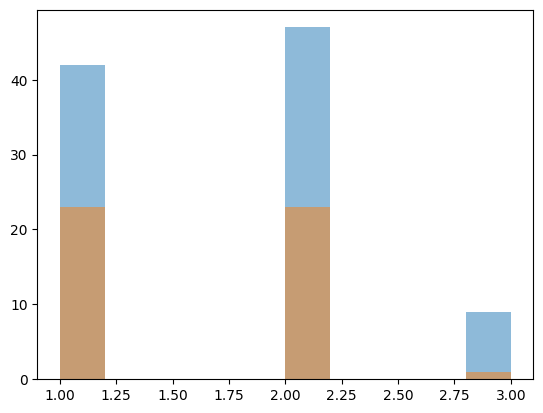

In [953]:
plt.hist(
    X_df["Student Age"].loc[y_df == 0],
    bins=10,
    alpha=0.5,
)

plt.hist(
    X_df["Student Age"].loc[y_df == 1],
    bins=10,
    alpha=0.5,
)

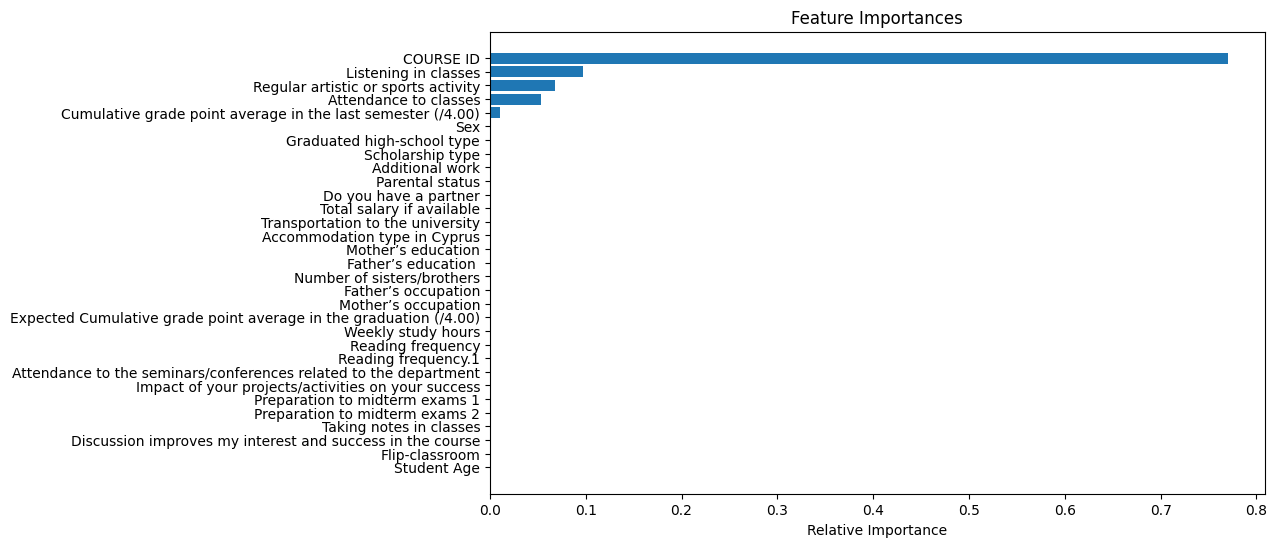

In [954]:
# Feature importance
importances = arbol.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.barh(range(X_train.shape[1]), importances[indices], align="center")
plt.yticks(range(X_train.shape[1]), X_train.columns[indices])
plt.xlabel("Relative Importance")
plt.show()

In [955]:
arbol = DecisionTreeClassifier(max_depth=30)
arbol.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=30)

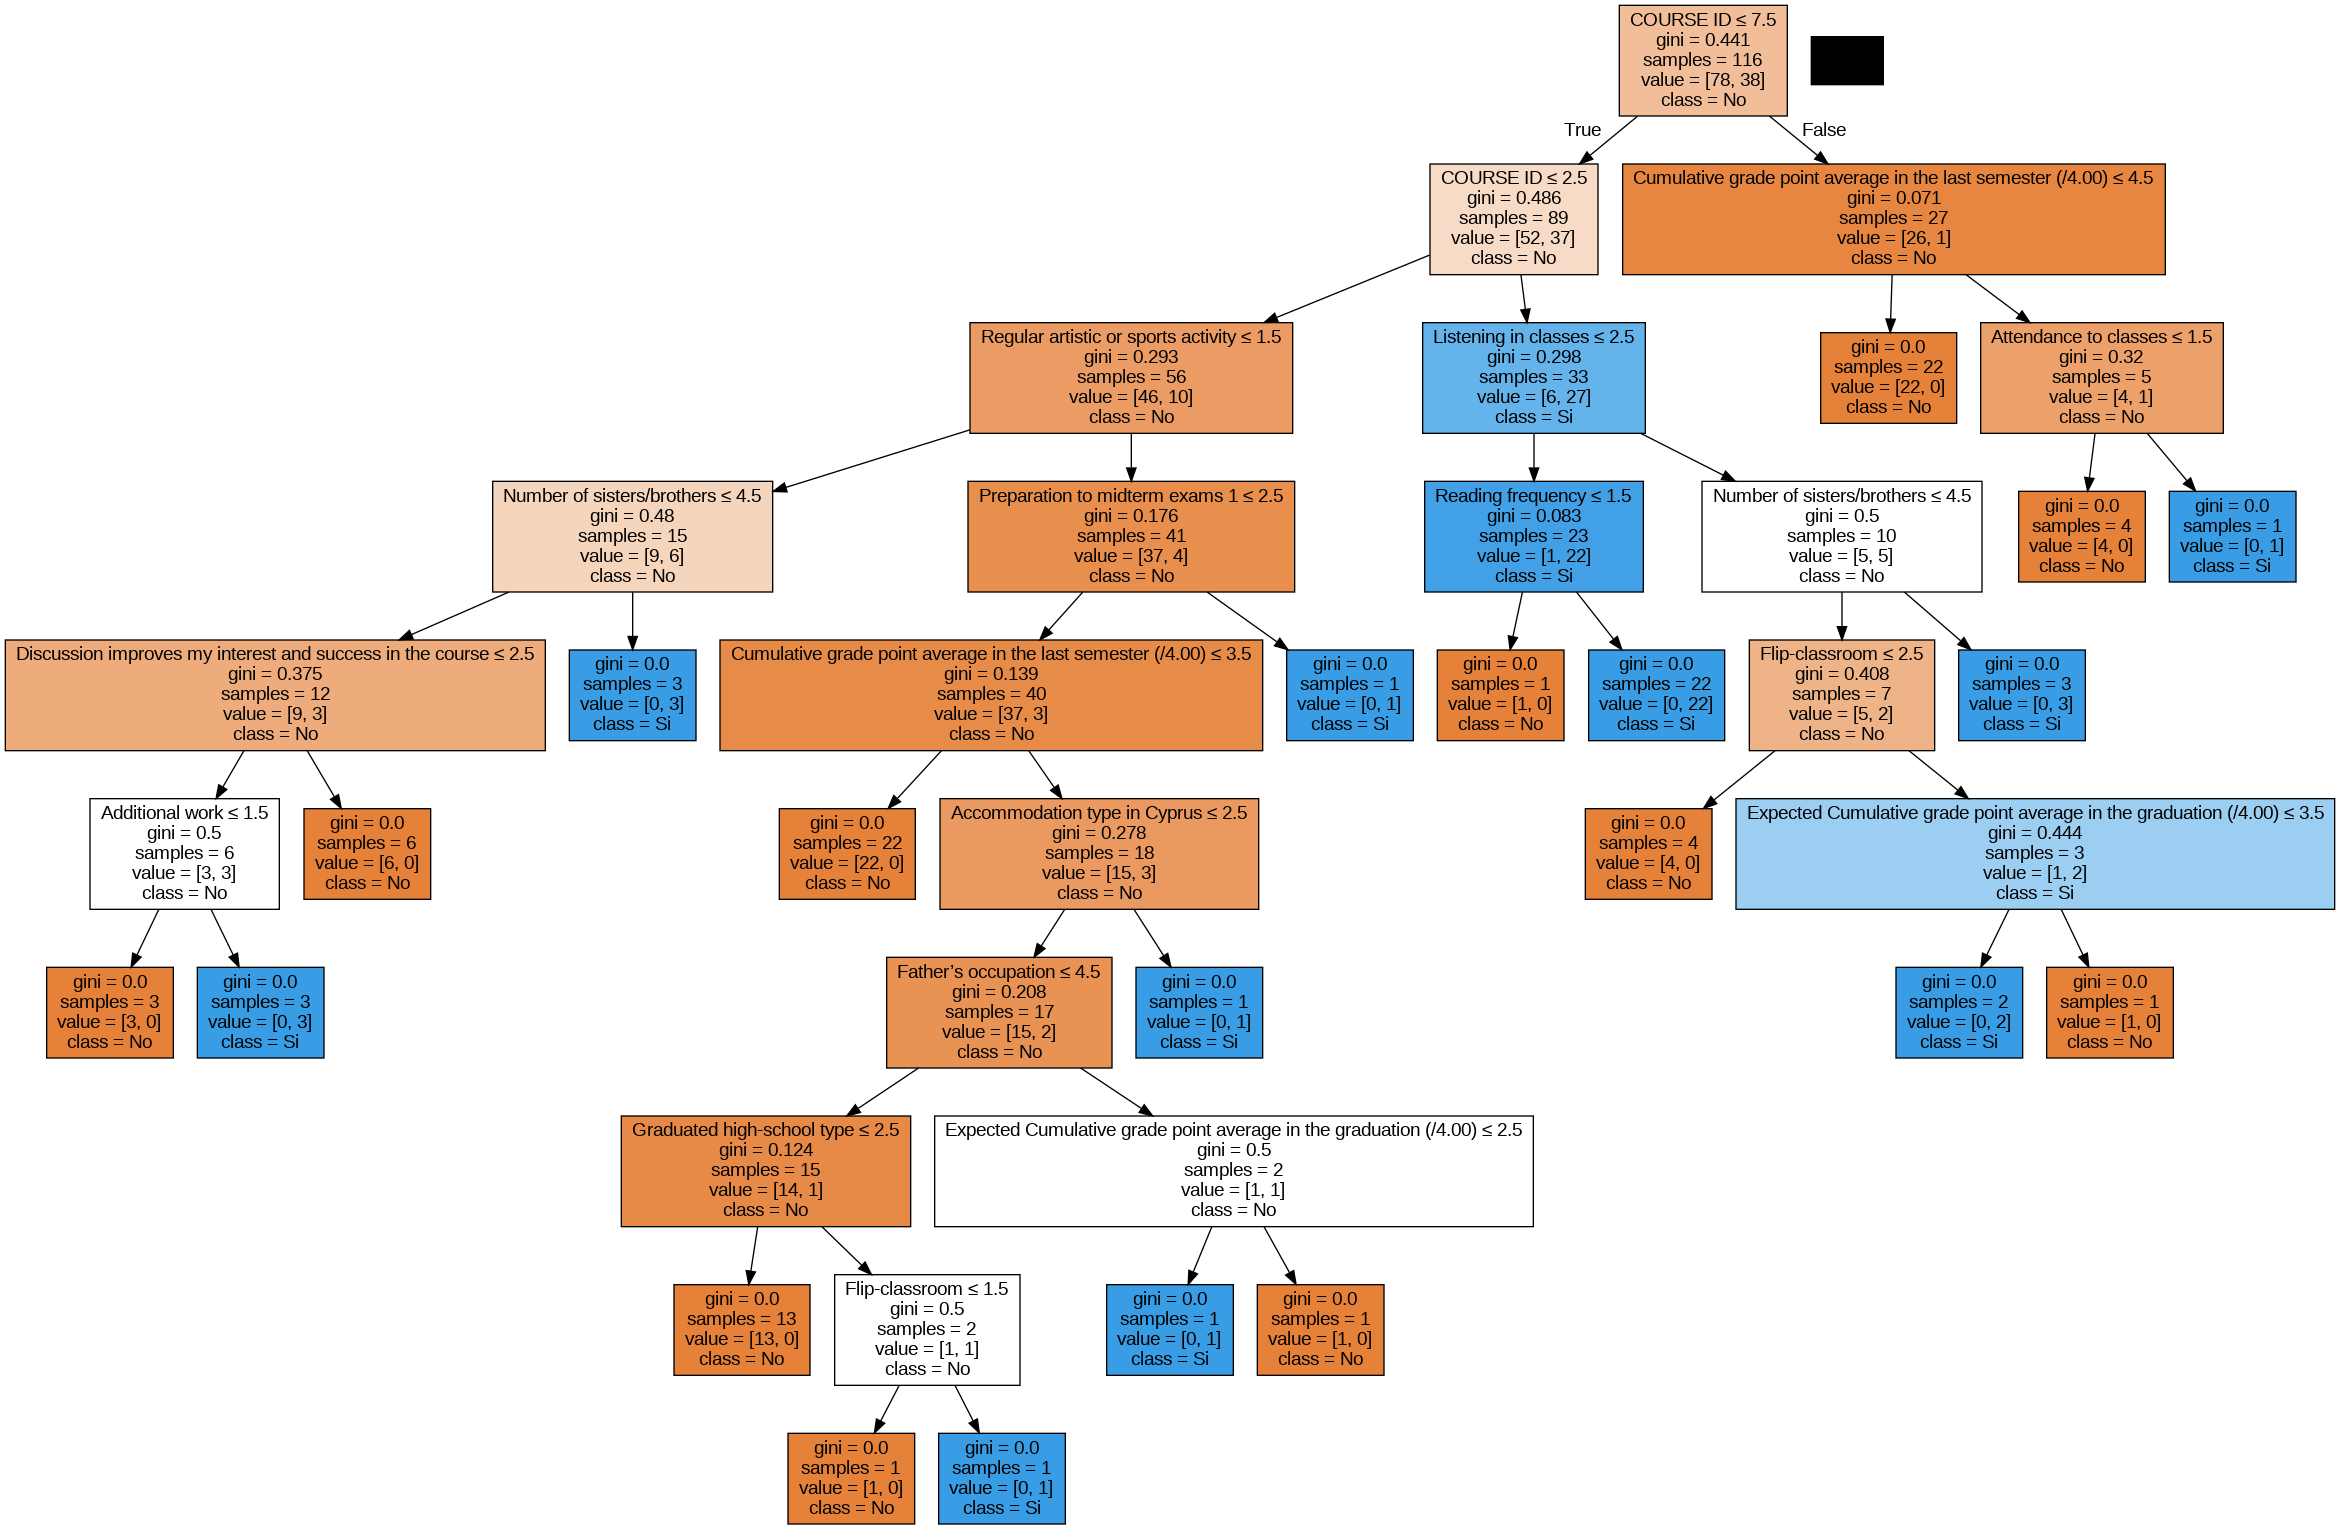

In [956]:

def dibujar_arbol(
    clf, c_name, f_name
):

    dot_data = StringIO()

    export_graphviz(
        clf,
        out_file=dot_data,
        filled=True,
        class_names=c_name,
        feature_names=f_name,
        special_characters=True,
    )

    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    display(Image(graph.create_png()))

dibujar_arbol(arbol, ["No", "Si"], X_df.columns)

##ROC AUC 2

In [957]:
ROC2 = roc_auc_score(y_test, y_pred)
ROC2
plt.show()

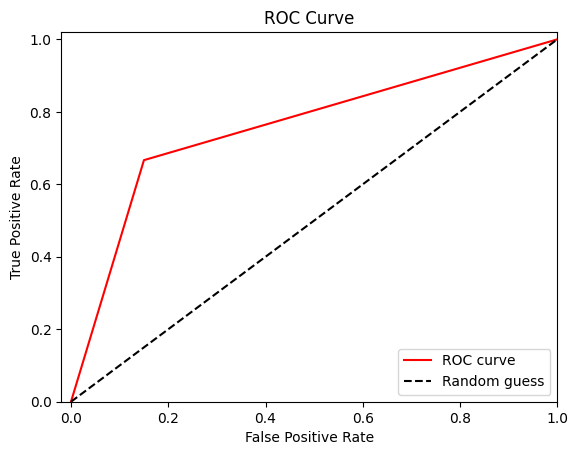

In [958]:
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label='ROC curve', color='r')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")

In [959]:
acc2 = accuracy_score(y_test, y_pred)
acc2

0.7931034482758621

In [960]:
precision2 = precision_score(y_test, y_pred)
precision2

0.6666666666666666

In [961]:
#cambiar de categoricos a numericos
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
std['Graduated high-school type'] = labelencoder.fit_transform(std['Graduated high-school type'])
std['Scholarship type'] = labelencoder.fit_transform(std['Scholarship type'])
std['Additional work'] = labelencoder.fit_transform(std['Additional work'])
std['Regular artistic or sports activity'] = labelencoder.fit_transform(std['Regular artistic or sports activity'])
std['Do you have a partner'] = labelencoder.fit_transform(std['Do you have a partner'])
std['Transportation to the university'] = labelencoder.fit_transform(std['Transportation to the university'])
std['Accommodation type in Cyprus'] = labelencoder.fit_transform(std['Accommodation type in Cyprus'])
std['Mother’s education'] = labelencoder.fit_transform(std['Mother’s education'])
std['Father’s occupation'] = labelencoder.fit_transform(std['Father’s occupation'])
std['Parental status'] = labelencoder.fit_transform(std['Parental status'])
std['Mother’s occupation'] = labelencoder.fit_transform(std['Mother’s occupation'])
std['Father’s occupation'] = labelencoder.fit_transform(std['Father’s occupation'])
std['Attendance to the seminars/conferences related to the department'] = labelencoder.fit_transform(std['Attendance to the seminars/conferences related to the department'])
std['Impact of your projects/activities on your success'] = labelencoder.fit_transform(std['Impact of your projects/activities on your success'])
std['Discussion improves my interest and success in the course'] = labelencoder.fit_transform(std['Discussion improves my interest and success in the course'])
std['Flip-classroom'] = labelencoder.fit_transform(std['Flip-classroom'])

Sex                                                                 0
Graduated high-school type                                          0
Scholarship type                                                    0
Additional work                                                     0
Regular artistic or sports activity                                 0
Do you have a partner                                               0
Transportation to the university                                    0
Accommodation type in Cyprus                                        0
Mother’s education                                                  0
Father’s education                                                  0
Parental status                                                     0
Mother’s occupation                                                 0
Father’s occupation                                                 0
Reading frequency.1                                                 0
Attendance to the se

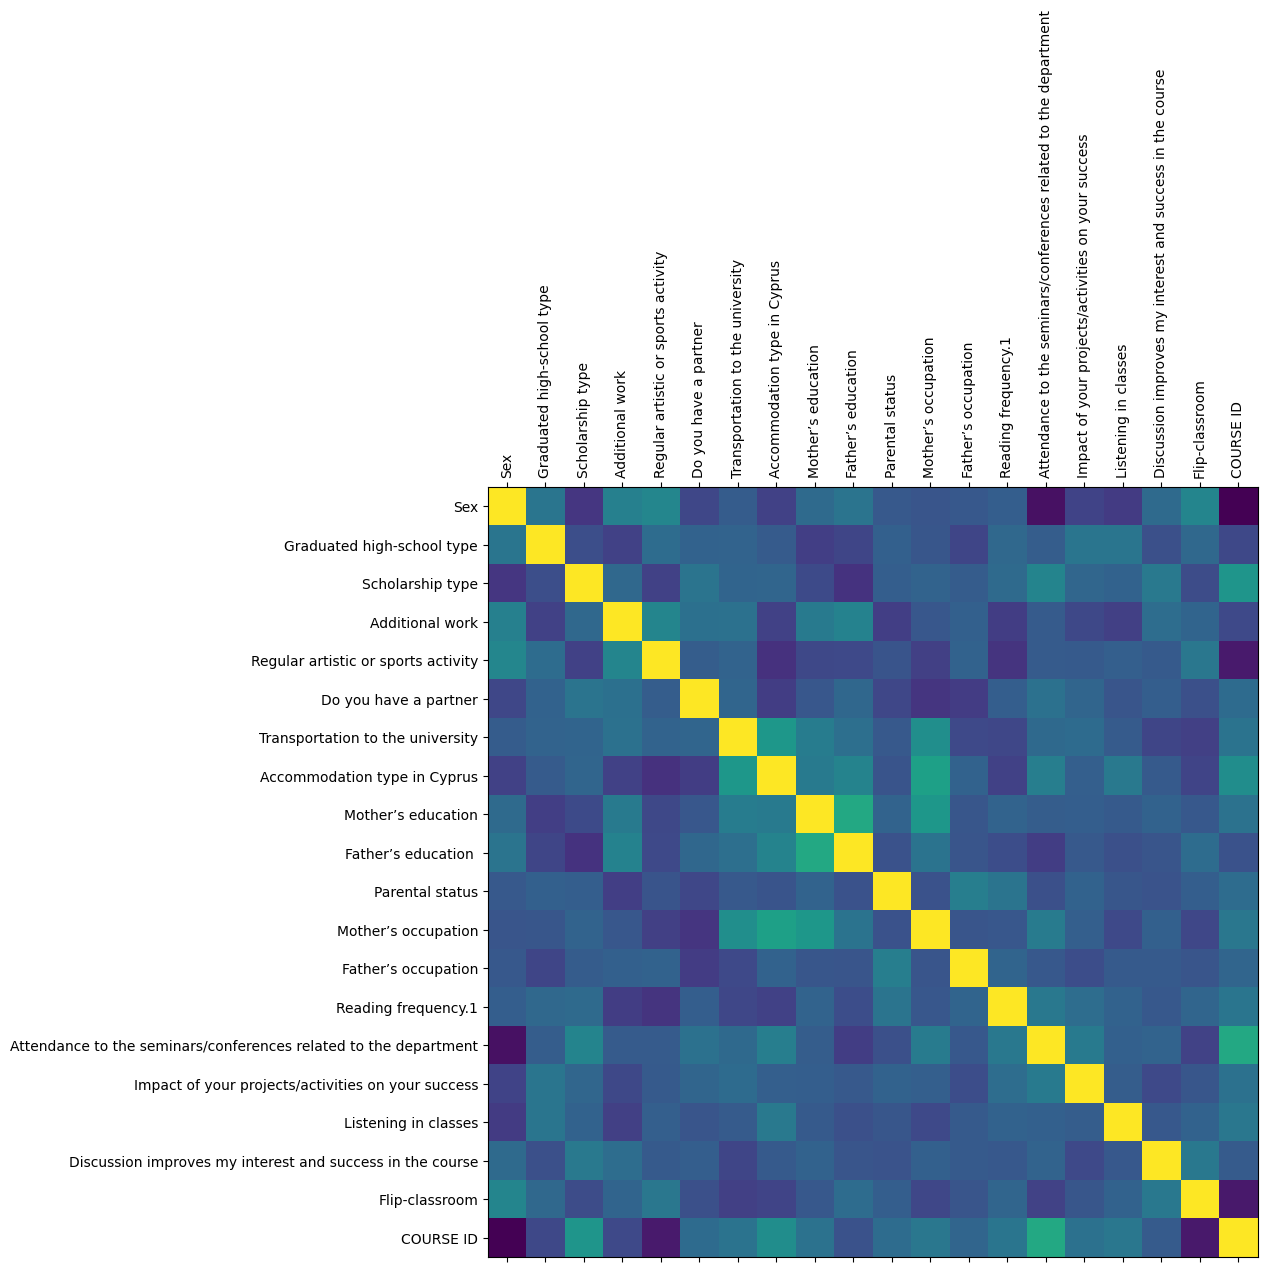

In [962]:
nan_count = std.isnull().sum()
print(std.isnull().sum())
if nan_count.sum() < 0.1 * len(std):
    std = std.fillna(std.mean())
else:
    std = std.dropna()

print(std.isnull().sum())

numeric_columns = std.select_dtypes(include=[np.number]).columns
ps= std[numeric_columns].corr()

fig, ax = plt.subplots(figsize=(10, 10))
ax.matshow(ps)
plt.xticks(range(len(ps.columns)), ps.columns)
plt.xticks(rotation=90)
plt.yticks(range(len(ps.columns)), ps.columns)

plt.show()

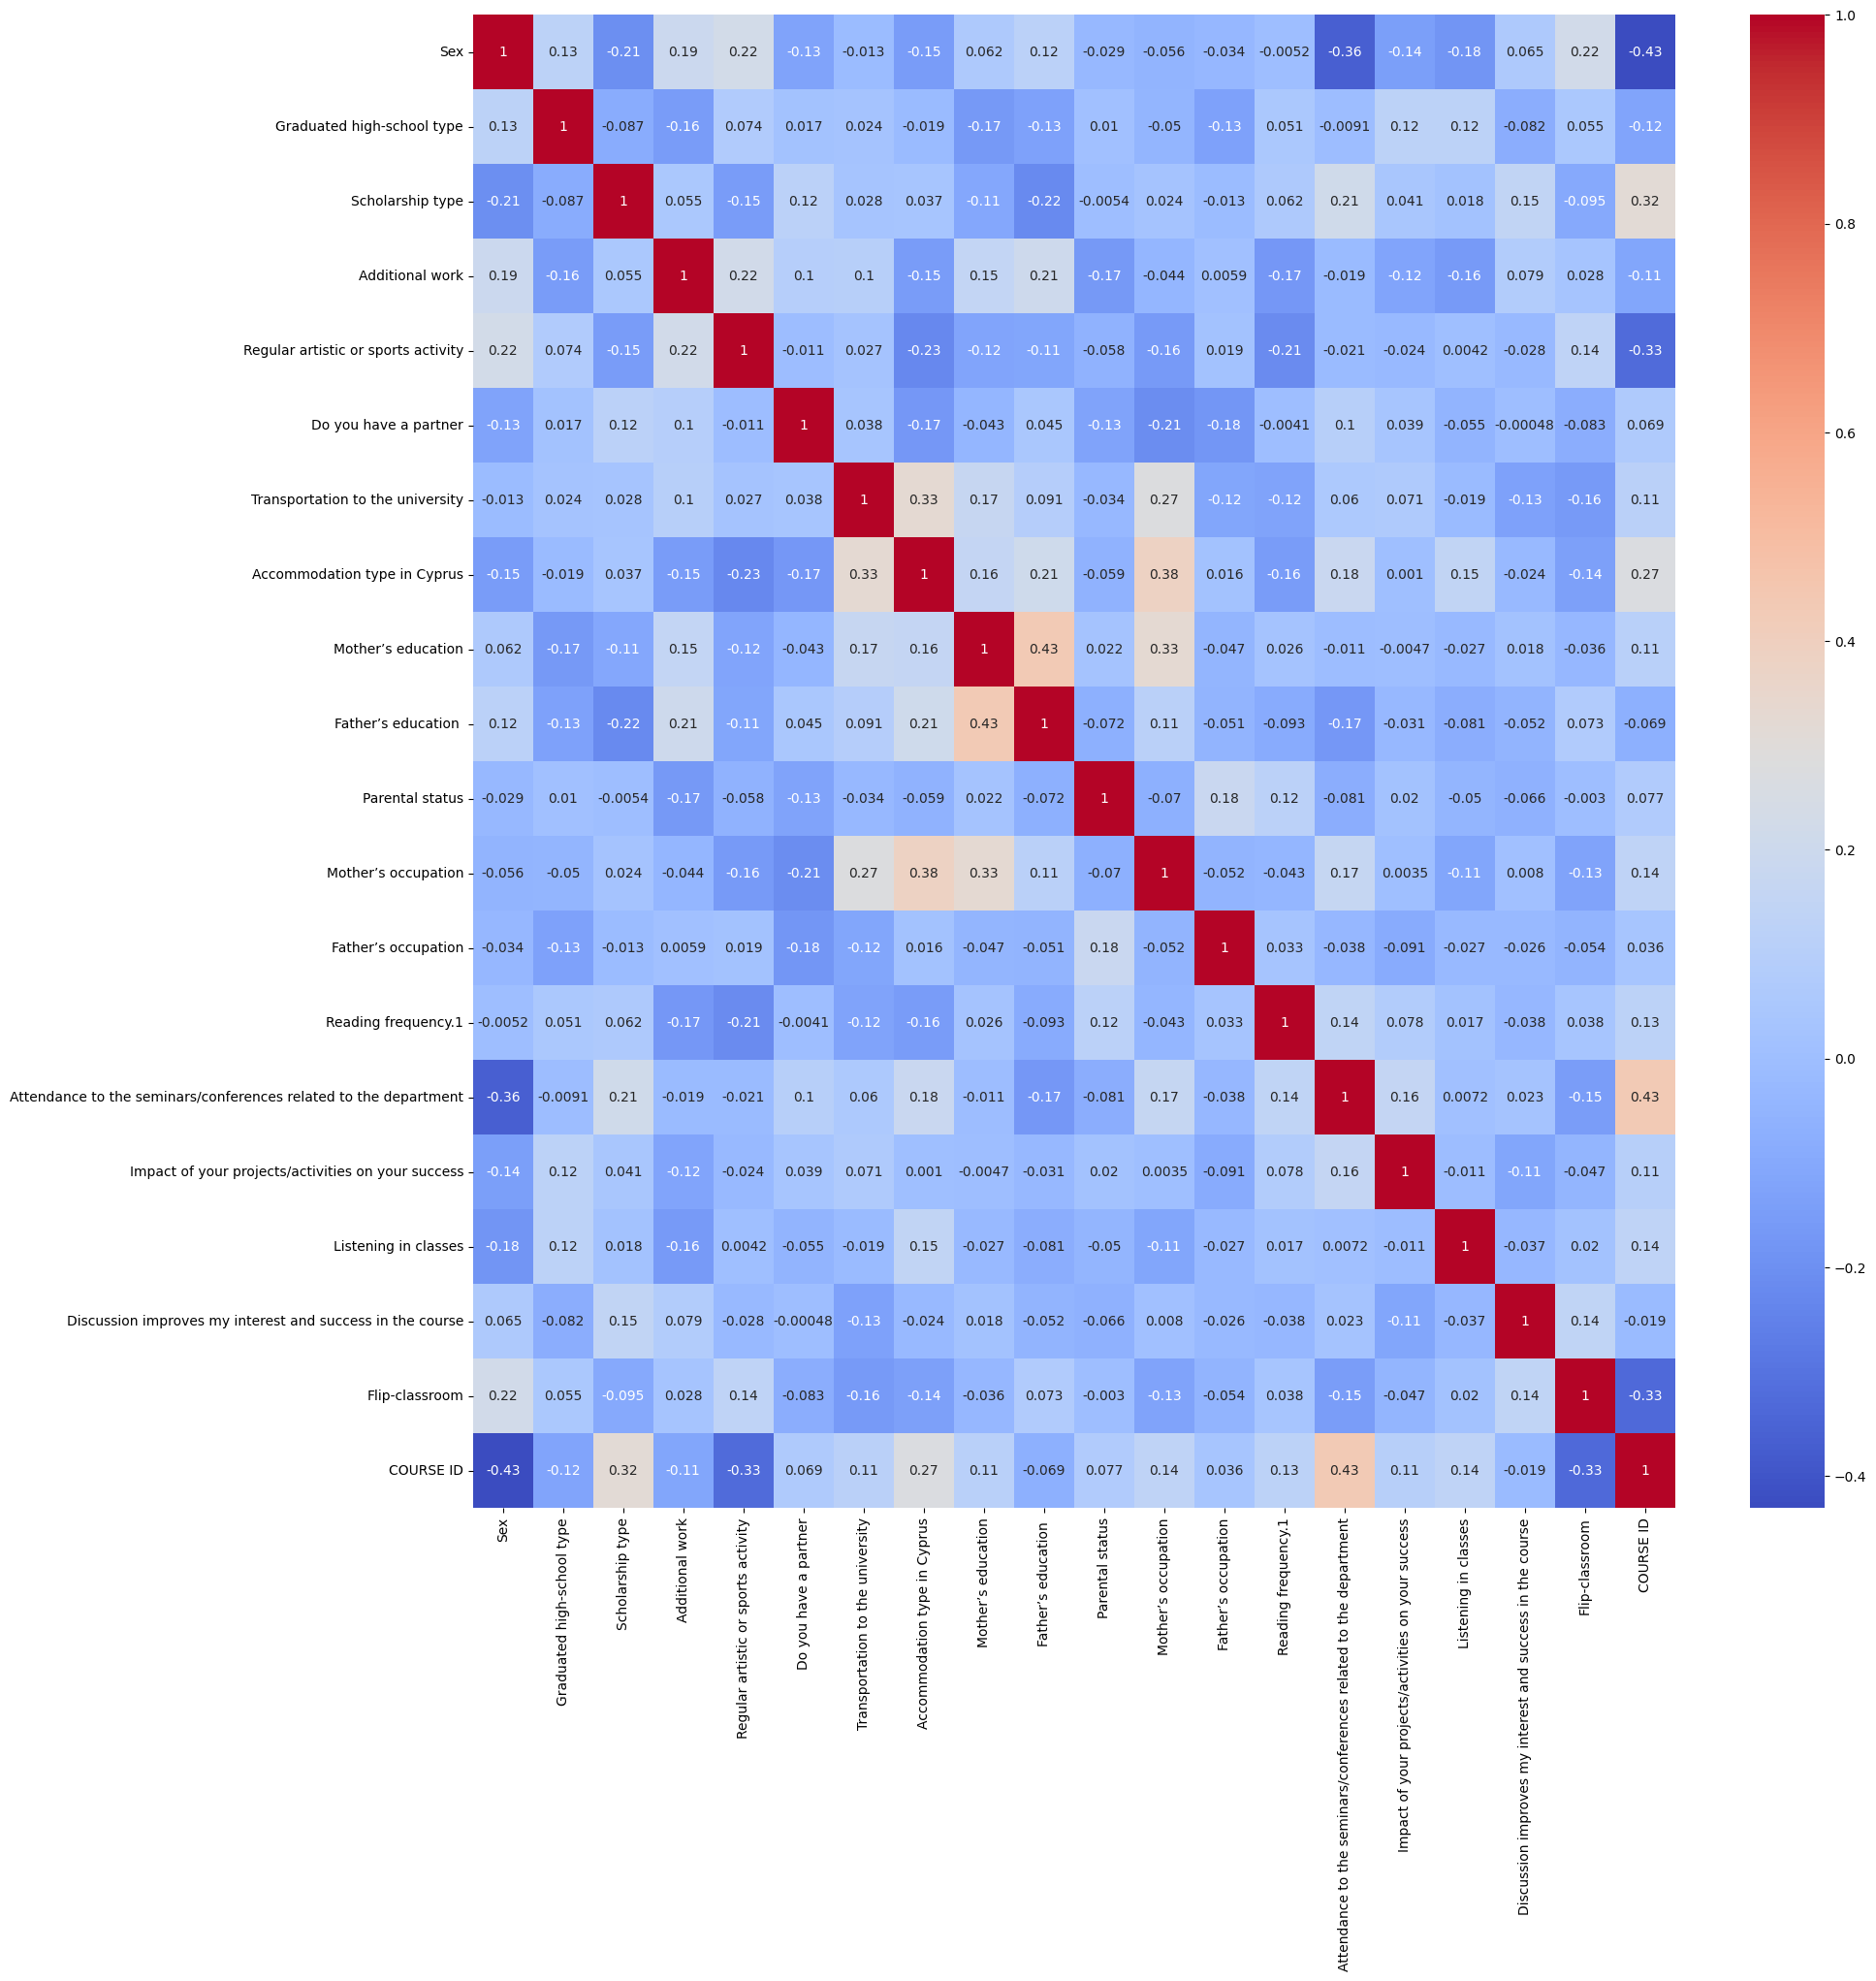

In [963]:
fig, ax =plt.subplots(figsize=(20, 20))
sns.heatmap(ps, annot=True, cmap='coolwarm', ax=ax)
plt.show()

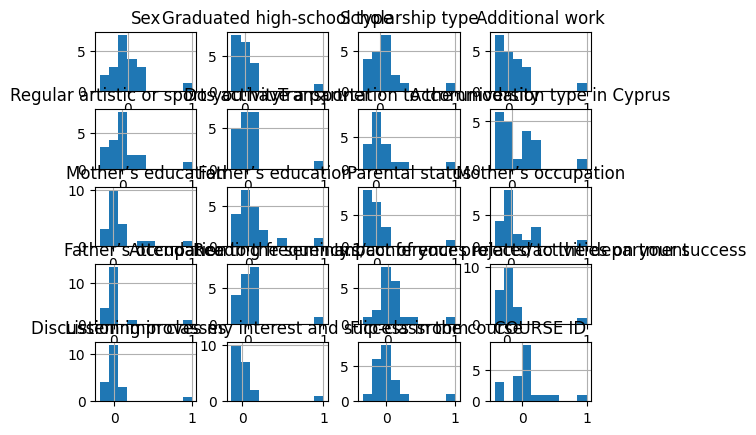

In [964]:
ps.hist()
plt.show()

In [965]:
from sklearn.model_selection import train_test_split

seed = 42

X = std.drop("GRADE", axis=1)
y = std["GRADE"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

#Regresion Logistica

In [966]:
#training
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

lr = LogisticRegression()
lr.fit(X_train, y_train)

print("Accuracy: ", acc)
print("Cross Validation: ", cv.mean())


Accuracy:  0.6896551724137931
Cross Validation:  0.7760869565217392


In [967]:
#prediccion
y_pred = lr.predict(X_test)

In [968]:
#accurracy
acc = accuracy_score(y_test, y_pred)
cv = cross_val_score(lr, X_train, y_train, cv=5)

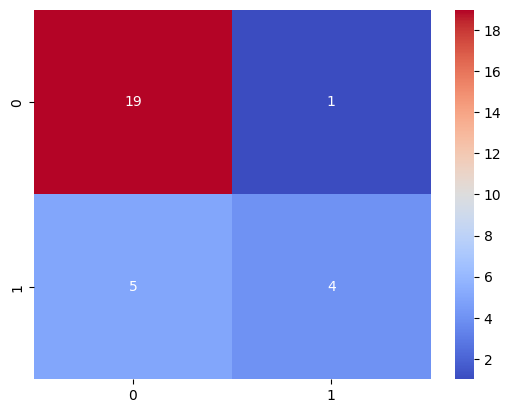

In [969]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='coolwarm')
plt.show()

In [970]:
#evaluacion de la regresion logistica

predictions = lr.predict(X_test)
print(predictions)

from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

[False False False False False False  True False  True False False False
 False False False False False False  True  True  True False False False
 False False False False False]
              precision    recall  f1-score   support

       False       0.79      0.95      0.86        20
        True       0.80      0.44      0.57         9

    accuracy                           0.79        29
   macro avg       0.80      0.70      0.72        29
weighted avg       0.79      0.79      0.77        29



#ROC AUC 3

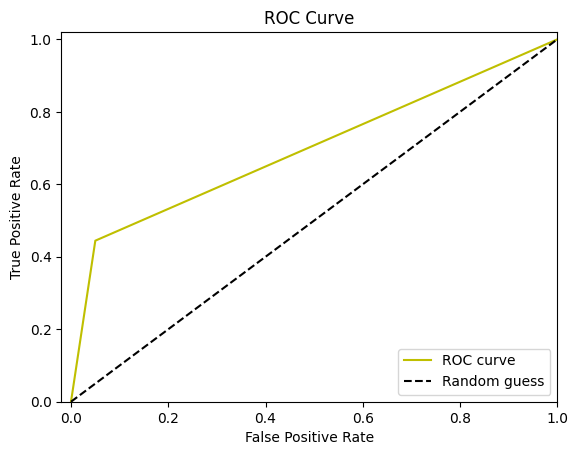

In [971]:
ROC3 = roc_auc_score(y_test, y_pred)
ROC3

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label='ROC curve', color='y')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")
plt.show()

In [972]:
#accurracy
acc3 = accuracy_score(y_test, y_pred)
acc3

0.7931034482758621

In [973]:
#precision
precision3 = precision_score(y_test, y_pred)
precision3

0.8

In [974]:
#feature importance
abs(log_model.coef_)
X_train.columns

Index(['Sex', 'Graduated high-school type', 'Scholarship type',
       'Additional work', 'Regular artistic or sports activity',
       'Do you have a partner', 'Transportation to the university',
       'Accommodation type in Cyprus', 'Mother’s education',
       'Father’s education ', 'Parental status', 'Mother’s occupation',
       'Father’s occupation', 'Reading frequency.1',
       'Attendance to the seminars/conferences related to the department',
       'Impact of your projects/activities on your success',
       'Listening in classes',
       'Discussion improves my interest and success in the course',
       'Flip-classroom', 'COURSE ID'],
      dtype='object')

#Arboles modelo categorico

In [975]:
#arbol de decision
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
acc = accuracy_score(y_test, y_pred)
cv = cross_val_score(dt, X_train, y_train, cv=5)

print("Accuracy: ", acc)
print("Cross Validation: ", cv.mean())

Accuracy:  0.6896551724137931
Cross Validation:  0.7155797101449275


              precision    recall  f1-score   support

       False       0.79      0.75      0.77        20
        True       0.50      0.56      0.53         9

    accuracy                           0.69        29
   macro avg       0.64      0.65      0.65        29
weighted avg       0.70      0.69      0.69        29



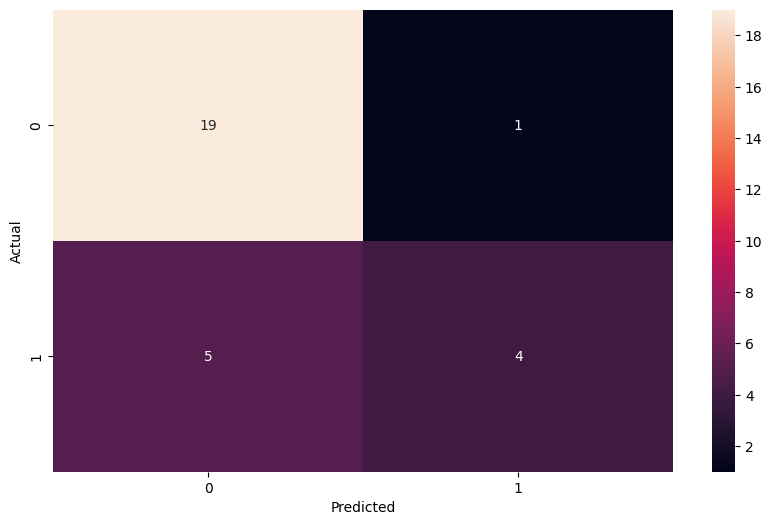

In [976]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(cm, annot=True, ax=ax)
_ = plt.xlabel("Predicted")
_ = plt.ylabel("Actual")

print(classification_report(y_test, y_pred))

In [977]:
#evaluacion del arbol de decision
predictions = dt.predict(X_test)
print(predictions)

from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

[ True False False False False False False  True False  True False False
 False  True  True  True False False  True False  True False False False
 False False  True  True False]
              precision    recall  f1-score   support

       False       0.79      0.75      0.77        20
        True       0.50      0.56      0.53         9

    accuracy                           0.69        29
   macro avg       0.64      0.65      0.65        29
weighted avg       0.70      0.69      0.69        29



#ROC AUC 4

In [978]:
ROC4 = roc_auc_score(y_test, y_pred)
ROC4

0.6527777777777778

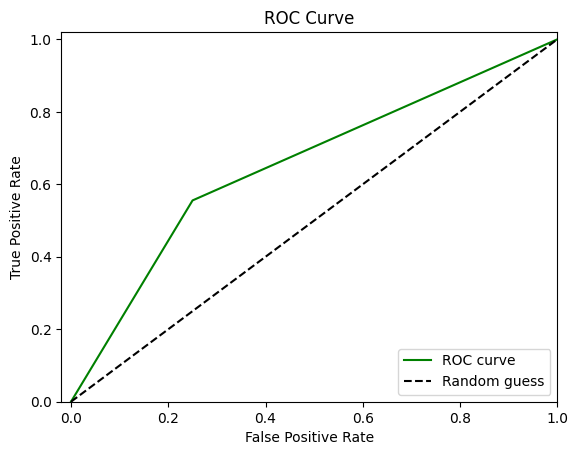

In [979]:
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label='ROC curve', color='g')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")
plt.show()

#Explorar hiperparametros

In [ ]:
# Definir el rango de hiperparámetros a explorar
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Configurar Grid Search con Cross Validation
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Ajustar el GridSearchCV a los datos de entrenamiento
grid_search.fit(X_train, y_train)

In [ ]:
# Imprimir los mejores hiperparámetros y la mejor puntuación usando el objeto grid_search
print("Mejores hiperparámetros:", grid_search.best_params_)
print("Mejor puntuación de validación cruzada:", grid_search.best_score_)

In [ ]:
acc4 = accuracy_score(y_test, y_pred)
acc4

In [ ]:
precision4 = precision_score(y_test, y_pred)
precision4

Feauters Importance

In [ ]:
X_train.columns

In [ ]:
dt_model.feature_importances_

In [ ]:
importances = dt_model.feature_importances_[::-1]
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
#plt.barh(range(X_train.shape[1]), importances[indices], align="center", color="g") porque no anda?
#plt.yticks(range(X_train.shape[1]), X_train.columns[indices])
plt.xlabel("Relative Importance")
plt.show()

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier # type: ignore

rf = RandomForestClassifier(n_estimators=25, random_state=seed)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
cv = cross_val_score(rf, X_train, y_train, cv=5)

print("Accuracy: ", acc)
print("Cross Validation: ", cv.mean())

#printeo los mejores hiperparametros para el modelo
print(rf.get_params())

In [ ]:
#evaluacion del random forest
predictions = rf.predict(X_test)
print(predictions)

#confusion matrix
from sklearn.metrics import classification_report # type: ignore
print(classification_report(y_test, predictions))

In [ ]:
import pandas as pd # make sure pandas is imported
import numpy as np # make sure numpy is imported

coefficients = lr.coef_[0]

# Get the feature names used during model training
feature_names = lr.feature_names_in_

coef_df = pd.DataFrame({
    'Feature': feature_names,  # Use feature names from the model
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)
print(coef_df)

#comparacion de modelos

In [ ]:
# Creacion pd.Dataframe para comprarar metricas de los 4 modelos
data = {
    "Model": ["Logistic Regression (#)", "Decision Tree (#)", "Logistic Regression (# y ABC)", "Decision Tree (# y ABC)"],
    "Accuracy": [acc1, acc2, acc3, acc4],
    "Precision": [precision1, precision2, precision3, precision4],
    "ROC AUC Score": [ROC1, ROC2, ROC3, ROC4]
}
# Crear df
df = pd.DataFrame(data)
df